In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('390 Model Performance - Sheet2.csv')
df.rename(columns={'baseline mase': 'Baseline MASE'}, inplace=True)
df.replace("univariate prophet", "prophet uni", inplace=True)
df.replace("multivariate prophet", "prophet multi", inplace=True)  
df.replace("sarima ", "sarima", inplace=True)

In [88]:
df['model type'].unique()

array(['arima', 'prophet uni', 'xgboost', 'sarima', 'auto-arima',
       'prophet multi', 'lstm'], dtype=object)

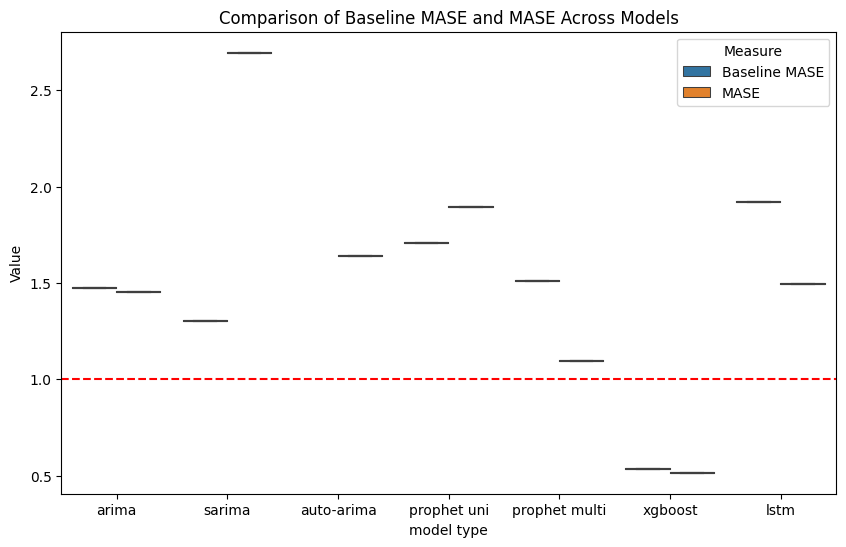

In [91]:
plt.figure(figsize=(10, 6))
mase_avgs = df.groupby("model type").mean()[["Baseline MASE", "MASE"]]
plot_order = ["arima", "sarima", "auto-arima", "prophet uni", "prophet multi", "xgboost", "lstm"]
mase_avgs = mase_avgs.reindex(plot_order).reset_index()
df_melted = mase_avgs.melt(id_vars=["model type"], var_name="Measure", value_name="Value")
g = sns.boxplot(x="model type", y="Value", hue="Measure", data=df_melted)
# g.set_xticklabels(rotation=25, horizontalalignment='right')

plt.axhline(y=1, c='red', linestyle='dashed', label="horizontal")

plt.title('Comparison of Baseline MASE and MASE Across Models')
plt.show()

<Figure size 1000x600 with 0 Axes>

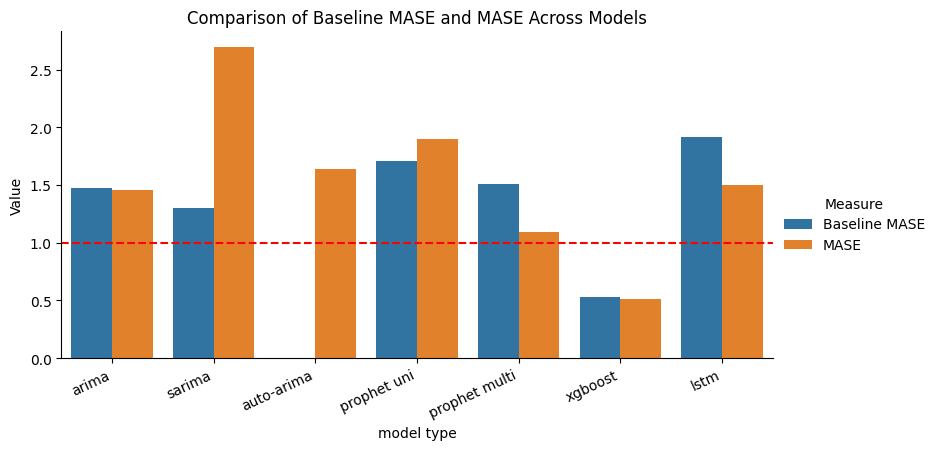

In [89]:
plt.figure(figsize=(10, 6))
mase_avgs = df.groupby("model type").mean()[["Baseline MASE", "MASE"]]
plot_order = ["arima", "sarima", "auto-arima", "prophet uni", "prophet multi", "xgboost", "lstm"]
mase_avgs = mase_avgs.reindex(plot_order).reset_index()
df_melted = mase_avgs.melt(id_vars=["model type"], var_name="Measure", value_name="Value")
g = sns.catplot(x="model type", y="Value", hue="Measure", data=df_melted, kind="bar", height=4, aspect=2, legend=True)
g.set_xticklabels(rotation=25, horizontalalignment='right')

plt.axhline(y=1, c='red', linestyle='dashed', label="horizontal")

plt.title('Comparison of Baseline MASE and MASE Across Models')
plt.show()

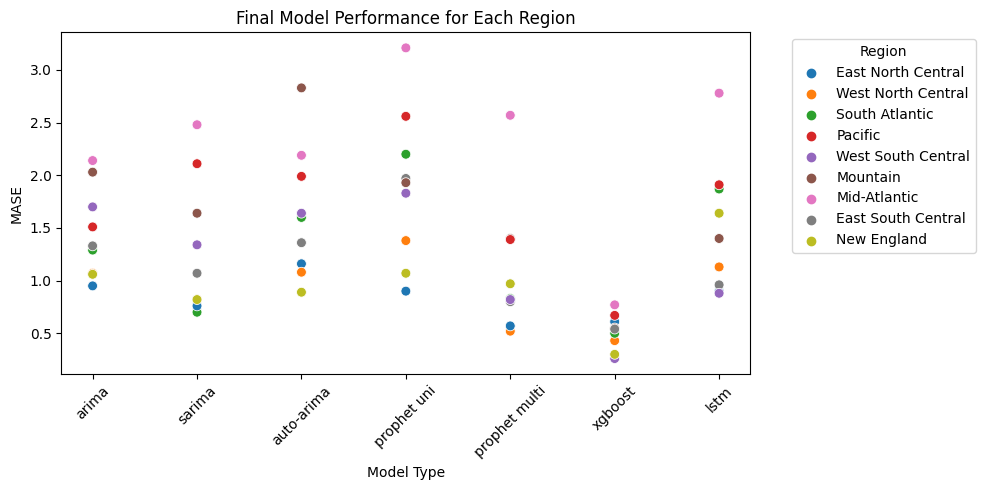

In [92]:
plt.figure(figsize=(10, 5))
tmp = df.copy()
custom_order = {'arima': 0, 'sarima': 1, 'auto-arima': 2, 'prophet uni': 3, 'prophet multi': 4, 'xgboost': 5, 'lstm': 6} 
# plot_order = ["arima", "sarima", "auto-arima", "prophet uni", "prophet multi", "xgboost", "lstm"]
tmp.sort_values(by=['model type'], key=lambda x: x.map(custom_order), inplace=True)
tmp.loc[tmp['model type'] == 'sarima', 'MASE'] = tmp.loc[tmp['model type'] == 'sarima', 'Baseline MASE'] 
# sar = df[df['model type'] == 'sarima']
# print(tmp[tmp["model type"] == "sarima"]["MASE"])
g = sns.scatterplot(data=tmp, x="model type", y="MASE", hue="region", s=50)

plt.title('Final Model Performance for Each Region')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc=2)  # Place the legend outside the plot
plt.ylabel('MASE')  # Set the y-axis label
plt.xlabel('Model Type')  # Set the x-axis label

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [50]:
tmp

,model type,region,Baseline MASE,MASE,RMSE,MAE
0,arima,East North Central,0.98,0.95,9437,8152
1,arima,East South Central,1.32,1.33,6330,4566
2,arima,Mid-Atlantic,2.03,2.14,6095.2,5310
3,arima,Mountain,2.04,2.03,7858,6802
4,arima,New England,0.88,1.06,3449,2924
...,...,...,...,...,...,...
58,lstm,New England,1.22,1.64,5260,4404
59,lstm,Pacific,2.65,1.91,18374,13894
60,lstm,South Atlantic,1.82,1.87,23963,20789
61,lstm,West North Central,2.73,1.13,4479,3826
